# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [ ]:
import tensorflow as tf
import pandas as pd

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Downlaoding the Dataset

! wget http://ufldl.stanford.edu/housenumbers/train.tar.gz
! wget http://ufldl.stanford.edu/housenumbers/test.tar.gz

--2020-11-05 17:49:05--  http://ufldl.stanford.edu/housenumbers/train.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404141560 (385M) [application/x-gzip]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>] 385.42M  3.50MB/s    in 54s     

2020-11-05 17:49:59 (7.18 MB/s) - ‘train.tar.gz’ saved [404141560/404141560]

--2020-11-05 17:49:59--  http://ufldl.stanford.edu/housenumbers/test.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276555967 (264M) [application/x-gzip]
Saving to: ‘test.tar.gz’

test.tar.gz         100%[===================>] 263.74M  8.91MB/s    in 1m 53s  

2020-11-05 17:51:52 (2.34 MB/s) - ‘test.tar.gz’ saved [276555967/2

In [ ]:
# Extracting Test Images

! tar -xzf test.tar.gz

In [ ]:
# Extracting Train Images

! tar -xzf train.tar.gz

In [ ]:
! pip install mat73

In [ ]:
from mat73 import loadmat

In [ ]:
# Load the dataset from your Drive folder

MATRIX = {}

MATRIX["train"] = loadmat('train/digitStruct.mat')
MATRIX["test"] = loadmat('test/digitStruct.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
SIZE = {}

SIZE["train"] = len(MATRIX["train"]["digitStruct"]["name"])
SIZE["test"] = len(MATRIX["test"]["digitStruct"]["name"])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
from skimage.color import rgb2gray
from collections import Counter

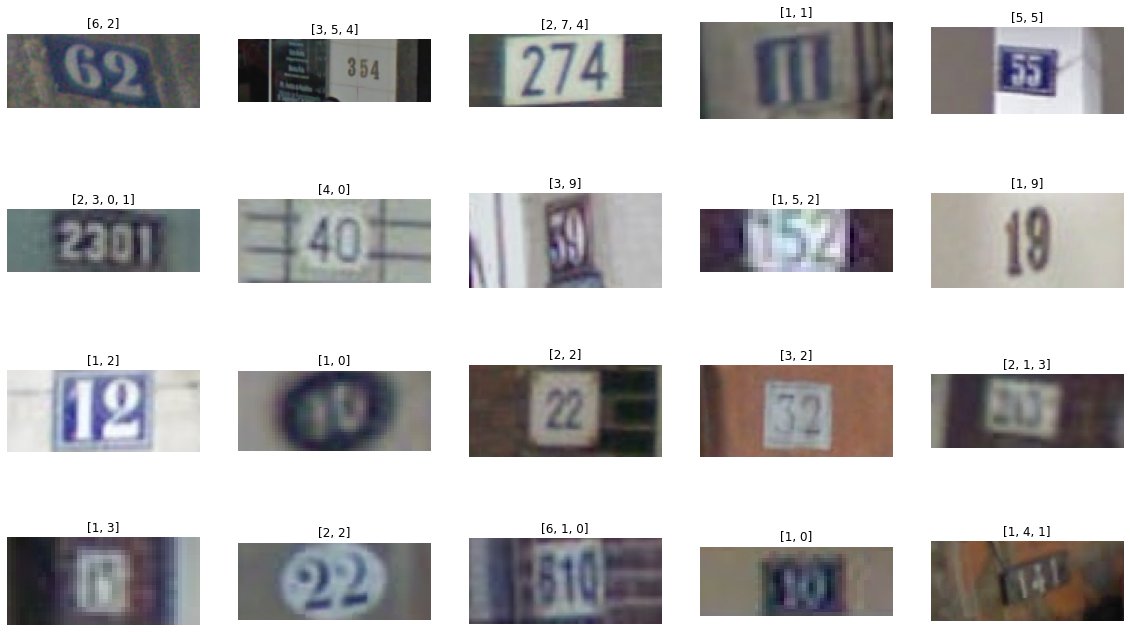

In [ ]:
plt.rcParams["figure.figsize"] = 20, 12

for idx in range(20):
  plt.subplot(4, 5, idx+1)
  e = np.random.randint(0, SIZE["train"])
  img = plt.imread("train/{}.png".format(e+1))
  plt.imshow(img)
  plt.axis('off')
  plt.title((np.array(MATRIX["train"]["digitStruct"]["bbox"][e]["label"], dtype=np.int16)%10).tolist())
plt.show()

plt.rcParams["figure.figsize"] = 5, 4

In [ ]:
"""
The function does these operation on the follwoing sequences:
+ For Image:
  + Get the best crop position so that all the digits are included.
  + Convert image into gray scale.
  + Resize the image into (32, 32)
+ For Label:
  + Return Labels as a list
"""

data_point = lambda img, data: (
                                transform.resize(image = rgb2gray(img[np.abs(data.top).min().astype(np.int16):(np.abs(data.top) + np.abs(data.height)).max().astype(np.int16), 
                                                                      np.abs(data.left).min().astype(np.int16):(np.abs(data.left) + np.abs(data.width)).max().astype(np.int16)]),
                                                 output_shape=(32, 32)),
                              
                                [abs(int(x)%10) for x in data.label]
                              ) \
                              if type(data.label) == list else \
                              (
                                transform.resize(image = rgb2gray(
                                                                    img[int(abs(data.top)):int(abs(data.top) + abs(data.height)), 
                                                                        int(abs(data.left)):int(abs(data.left) + abs(data.width))]
                                                                 ),
                                                 output_shape=(32, 32)),
                              
                                [abs(int(data.label)%10)]
                              )

In [ ]:
def fill_arrays(path):
    """
    This function takes the path of the folder where iamges are located.
    It prepares the data so that it can be used for data anlaysis and mdoelling.
    """

    image_array = []
    label_array = []
    i = 0
    
    while(i < SIZE[path]):
      img = plt.imread("{}/{}".format(path, MATRIX[path]["digitStruct"]["name"][i]))
      img, labels = data_point(img, MATRIX[path]["digitStruct"]["bbox"][i])

      image_array.append(img)
      label_array.append(labels)

      i += 1
      
    return  image_array, label_array

In [ ]:
train_images, train_labels = fill_arrays("train")
test_images, test_labels = fill_arrays("test")

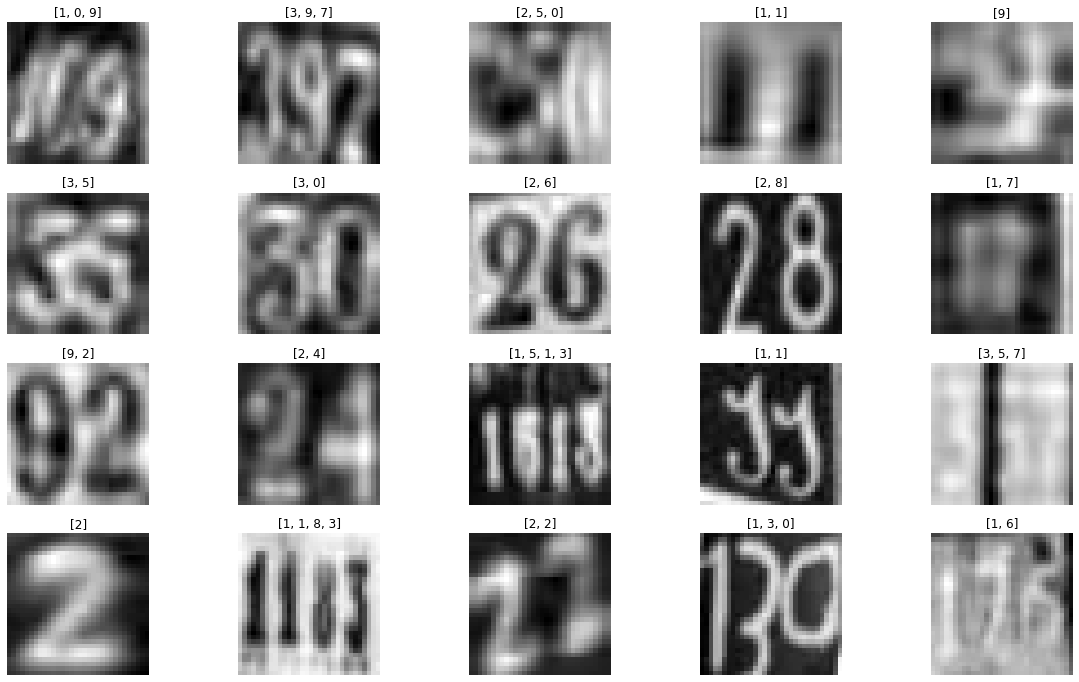

In [ ]:
plt.rcParams["figure.figsize"] = 20, 12

for idx in range(20):
  plt.subplot(4, 5, idx+1)
  e = np.random.randint(0, SIZE["train"])
  plt.imshow(train_images[e],cmap="binary")
  plt.axis('off')
  plt.title(train_labels[e])
plt.show()

plt.rcParams["figure.figsize"] = 5, 4

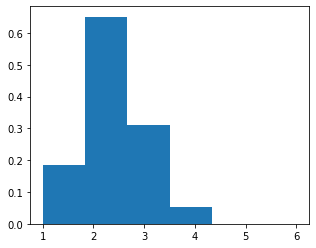

Counter({1: 5137, 2: 18130, 3: 8691, 4: 1434, 5: 9, 6: 1})

In [ ]:
# Frequency of x digit numbers in training set.

train_dist = list(map(lambda x: len(x), train_labels))

plt.hist(train_dist, bins=6, density=True)
plt.show()

Counter(train_dist)

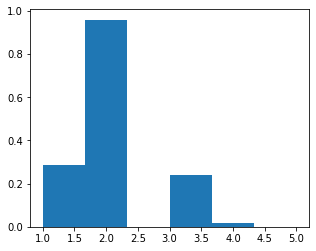

Counter({1: 2483, 2: 8356, 3: 2081, 4: 146, 5: 2})

In [ ]:
# Frequency of x digit numbers in training set.

test_dist = list(map(lambda x: len(x), test_labels))

plt.hist(test_dist, bins=6, density=True, )
plt.show()

Counter(test_dist)

In [ ]:
# NOTE: The dataset is hughely imbalanced with repsect to the number of digits in the images.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
X_train = np.array(train_images)
X_test = np.array(test_images)


# Create MultiLabelBinarizer object
one_hot = MultiLabelBinarizer()
one_hot.fit(train_labels)

Y_train = one_hot.transform(train_labels)
Y_test = one_hot.transform(test_labels)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
from tensorflow.keras import layers, models, optimizers, metrics, losses, callbacks

In [ ]:
def SequentialModel(input_shape):
    """
    NOTE: Since there aree more than one diigts prense tin each aimge, hecne I am going to threat this problem as
          multi label classification where an image can have more than one labels. For this case, Softamax activation
          doesn't make any sense in the final layer. It is sutaible for multiclass classifcation but not for multilabel
          classifcation. Therfore, I am going to use Sigmoid activation in final layer whith 10 units which enocodes
          the probability of each digit by a Bernoulli varaible.
          Same reason goes for the model loss as well. It doesn't make any sense to use Categeorical cross entropy which is
          sutaible for multi-c;ass classfication, but not for multi-label classfication.
    """
    model = models.Sequential([
                              layers.InputLayer(input_shape=input_shape),
                              layers.Flatten(),
                              layers.Dense(60, activation="relu"),
                              layers.Dense(100, activation="relu"),
                              layers.Dense(100, activation="relu"),
                              layers.Dense(10, activation="sigmoid")
    ])

    model.compile(optimizer = "adam", 
                  loss = losses.BinaryCrossentropy(), 
                  metrics = [metrics.BinaryAccuracy("accuracy"), metrics.Precision(name="precision"), metrics.Recall(name="recall")])
    
    return model

In [ ]:
model_1 = SequentialModel(input_shape=(32, 32))

model_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 60)                61500     
_________________________________________________________________
dense_43 (Dense)             (None, 100)               6100      
_________________________________________________________________
dense_44 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1010      
Total params: 78,710
Trainable params: 78,710
Non-trainable params: 0
_________________________________________________________________


In [ ]:
! rm -rf sequential_model_checkpoint

In [ ]:
# Callbacks

seq_path = "sequential_model_checkpoints/checkpoint"
ckpt_seq = callbacks.ModelCheckpoint(filepath=seq_path, 
                                 monitor="val_accuracy", 
                                 verbose=True, 
                                 mode="max", 
                                 save_freq="epoch",
                                 save_weights_only=True,
                                 save_best_only=True)

csvl_seq = callbacks.CSVLogger(filename="sequential_model_CSV.csv")

In [ ]:
# Model Training

history = model_1.fit(x = X_train, 
                      y = Y_train, 
                      batch_size=300, 
                      epochs=50,
                      validation_split = 0.15,
                      callbacks = [ckpt_seq, csvl_seq],
                      verbose = 2)

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.79563, saving model to sequential_model_checkpoints/checkpoint
95/95 - 1s - loss: 0.5136 - accuracy: 0.7918 - precision: 0.2496 - recall: 0.0134 - val_loss: 0.5065 - val_accuracy: 0.7956 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50

Epoch 00002: val_accuracy did not improve from 0.79563
95/95 - 0s - loss: 0.4992 - accuracy: 0.7972 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4955 - val_accuracy: 0.7956 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50

Epoch 00003: val_accuracy improved from 0.79563 to 0.79765, saving model to sequential_model_checkpoints/checkpoint
95/95 - 0s - loss: 0.4852 - accuracy: 0.7977 - precision: 0.7317 - recall: 0.0036 - val_loss: 0.4768 - val_accuracy: 0.7976 - val_precision: 0.7563 - val_recall: 0.0145
Epoch 4/50

Epoch 00004: val_accuracy improved from 0.79765 to 0.80347, saving model to sequential_model_checkpoints/checkpoint
95/95 - 0s - loss: 0.

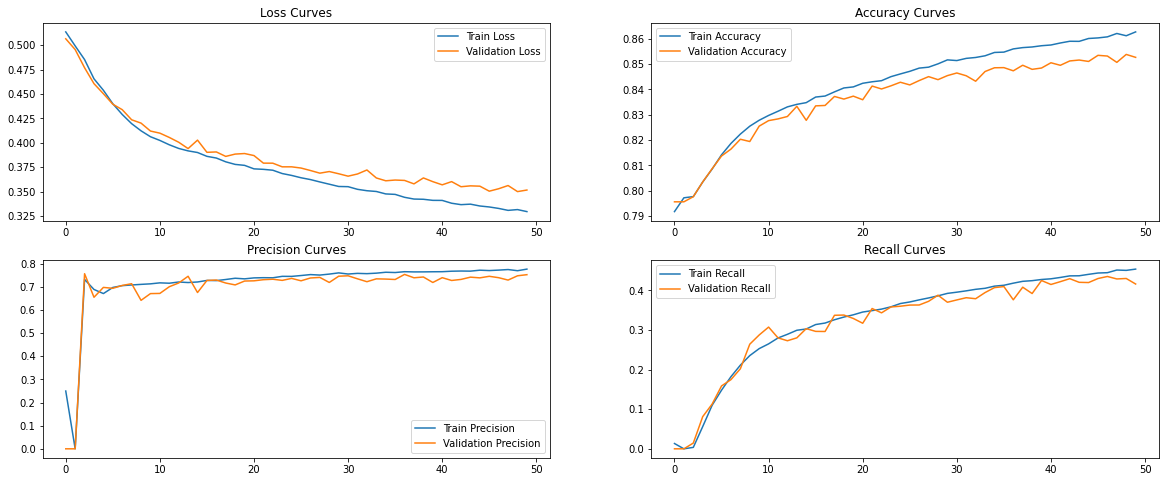

In [ ]:
# Reults Visualization

plt.rcParams["figure.figsize"] = 20, 8

plt.subplot(2, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Curves")

plt.subplot(2, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curves")


plt.subplot(2, 2, 3)
plt.plot(history.history["precision"], label="Train Precision")
plt.plot(history.history["val_precision"], label="Validation Precision")
plt.legend()
plt.title("Precision Curves")


plt.subplot(2, 2, 4)
plt.plot(history.history["recall"], label="Train Recall")
plt.plot(history.history["val_recall"], label="Validation Recall")
plt.legend()
plt.title("Recall Curves")

plt.show()

In [ ]:
# Evalaution on Test Set

seq_res = model_1.evaluate(x = X_test, 
                           y = Y_test, 
                           return_dict=True, 
                           verbose=False)

for key in seq_res.keys():
    if key != "loss":
      print("{}: {:0.6f}%".format(key.capitalize(), 100*seq_res[key]))
    else:
      print("{}: {:0.6f}".format(key.capitalize(), seq_res[key]))

Loss: 0.366178
Accuracy: 85.306132%
Precision: 68.388259%
Recall: 40.295342%


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
def CNNModel(input_shape):
    """
    NOTE: Since there aree more than one diigts prense tin each aimge, hecne I am going to threat this problem as
          multi label classification where an image can have more than one labels. For this case, Softamax activation
          doesn't make any sense in the final layer. It is sutaible for multiclass classifcation but not for multilabel
          classifcation. Therfore, I am going to use Sigmoid activation in final layer whith 10 units which enocodes
          the probability of each digit by a Bernoulli varaible.
          Same reason goes for the model loss as well. It doesn't make any sense to use Categeorical cross entropy which is
          sutaible for multi-class classfication, but not for multi-label classfication.
    """
    model = models.Sequential([
                              layers.InputLayer(input_shape=input_shape),
                              layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                              layers.Dropout(rate=0.2),
                              layers.BatchNormalization(),
                              layers.MaxPool2D(pool_size=(2,2)),
                              layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                              layers.Dropout(rate=0.2),
                              layers.BatchNormalization(),
                              layers.MaxPool2D(pool_size=(2,2)),
                              layers.Flatten(),
                              layers.Dense(20, activation="relu"),
                              layers.Dense(10, activation="sigmoid")
    ])

    model.compile(optimizer = "adam", 
                  loss = losses.BinaryCrossentropy(), 
                  metrics = [metrics.BinaryAccuracy("accuracy"), metrics.Precision(name="precision"), metrics.Recall(name="recall")])
    
    return model

In [ ]:
model_2 = CNNModel(input_shape=(32, 32, 1))

model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 64)      

In [ ]:
# Callbacks

cnn_path = "cnn_model_checkpoints/checkpoint"
ckpt_cnn = callbacks.ModelCheckpoint(filepath=cnn_path, 
                                 monitor="val_accuracy", 
                                 verbose=True, 
                                 mode="max", 
                                 save_freq="epoch",
                                 save_weights_only=True,
                                 save_best_only=True)

csvl_cnn = callbacks.CSVLogger(filename="cnn_model_CSV.csv")

estop_cnn = callbacks.EarlyStopping(monitor='val_accuracy', 
                                patience=5, 
                                verbose=0,
                                mode='max',
                                restore_best_weights=False)

In [ ]:
history = model_2.fit(x = X_train[..., np.newaxis], 
                      y = Y_train, 
                      batch_size=100, 
                      epochs=50,
                      validation_split = 0.15,
                      callbacks = [ckpt_cnn, csvl_cnn, estop_cnn],
                      verbose = 2)

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.63055, saving model to cnn_model_checkpoints/checkpoint
284/284 - 2s - loss: 0.4372 - accuracy: 0.8119 - precision: 0.5869 - recall: 0.2439 - val_loss: 0.8093 - val_accuracy: 0.6306 - val_precision: 0.2531 - val_recall: 0.4141
Epoch 2/50

Epoch 00002: val_accuracy improved from 0.63055 to 0.84568, saving model to cnn_model_checkpoints/checkpoint
284/284 - 2s - loss: 0.3449 - accuracy: 0.8547 - precision: 0.7319 - recall: 0.4472 - val_loss: 0.4141 - val_accuracy: 0.8457 - val_precision: 0.6647 - val_recall: 0.4943
Epoch 3/50

Epoch 00003: val_accuracy improved from 0.84568 to 0.86961, saving model to cnn_model_checkpoints/checkpoint
284/284 - 2s - loss: 0.3052 - accuracy: 0.8722 - precision: 0.7681 - recall: 0.5295 - val_loss: 0.3067 - val_accuracy: 0.8696 - val_precision: 0.7944 - val_recall: 0.4883
Epoch 4/50

Epoch 00004: val_accuracy did not improve from 0.86961
284/284 - 2s - loss: 0.2806 - accuracy: 0.8841 - precision: 

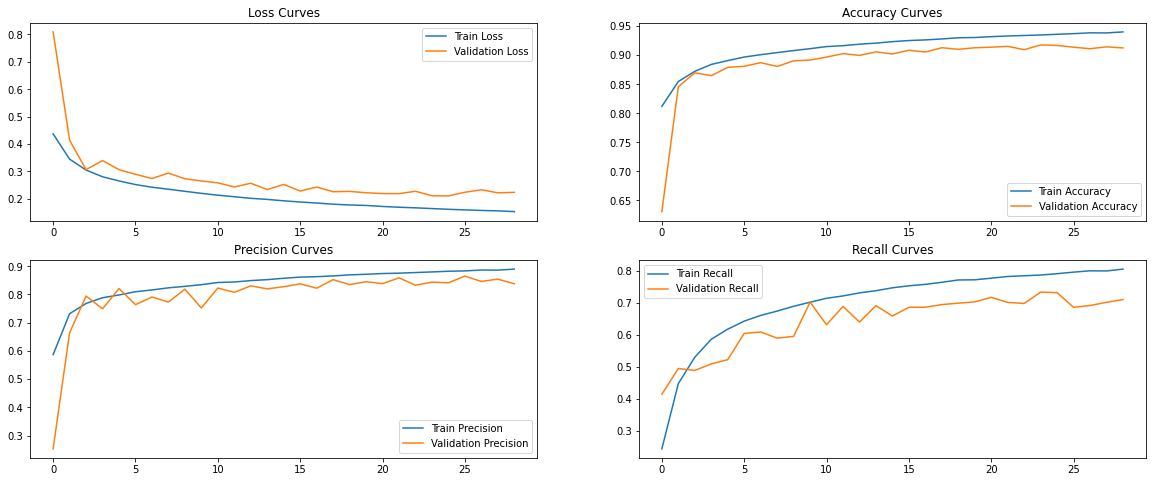

In [ ]:
# Reults Visualization

plt.rcParams["figure.figsize"] = 20, 8

plt.subplot(2, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Curves")

plt.subplot(2, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curves")


plt.subplot(2, 2, 3)
plt.plot(history.history["precision"], label="Train Precision")
plt.plot(history.history["val_precision"], label="Validation Precision")
plt.legend()
plt.title("Precision Curves")


plt.subplot(2, 2, 4)
plt.plot(history.history["recall"], label="Train Recall")
plt.plot(history.history["val_recall"], label="Validation Recall")
plt.legend()
plt.title("Recall Curves")

plt.show()

In [ ]:
# Evalaution on Test Set

cnn_res = model_2.evaluate(x = X_test[..., np.newaxis], 
                           y = Y_test, 
                           return_dict=True, 
                           verbose=False)

for key in cnn_res.keys():
    if key != "loss":
      print("{}: {:0.6f}%".format(key.capitalize(), 100*cnn_res[key]))
    else:
      print("{}: {:0.6f}".format(key.capitalize(), cnn_res[key]))

Loss: 0.230679
Accuracy: 91.500604%
Precision: 81.986928%
Recall: 70.090562%


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
# Loading best Sequential Model

best_seq = SequentialModel(input_shape=(32, 32))
best_seq.load_weights(seq_path)

In [ ]:
# NOTE: I have done this exercise for MultiLabel Classification. 
# Hence, the reviewer should see probability across multiple digits.

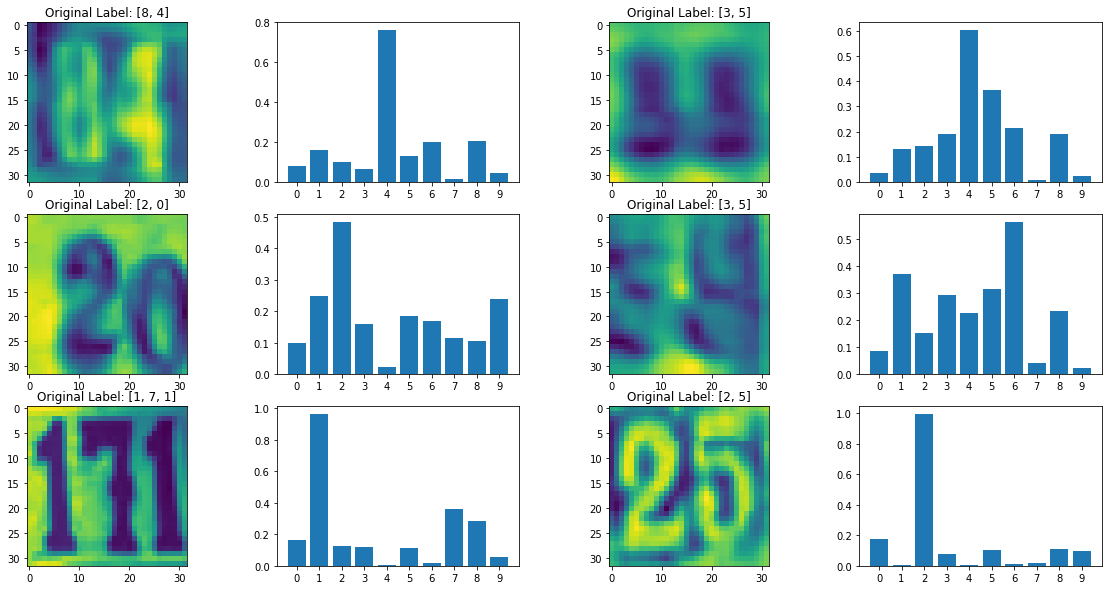

In [ ]:
# Predictions for best Sequential Model

plt.rcParams["figure.figsize"] = 20, 10

idx = np.random.randint(0, SIZE["train"], 6)

for i in range(6):
  plt.subplot(3, 4, 2*i+1)
  plt.imshow(train_images[idx[i]])
  plt.title("Original Label: {}".format(train_labels[idx[i]]))

  plt.subplot(3, 4, 2*i + 2)
  plt.bar(x = np.arange(10), height=best_seq.predict(train_images[idx[i]][np.newaxis, ...])[0])
  plt.xticks(np.arange(10))

plt.show()

In [ ]:
# Loading best CNN Model

best_cnn = CNNModel(input_shape=(32, 32, 1))
best_cnn.load_weights(cnn_path)

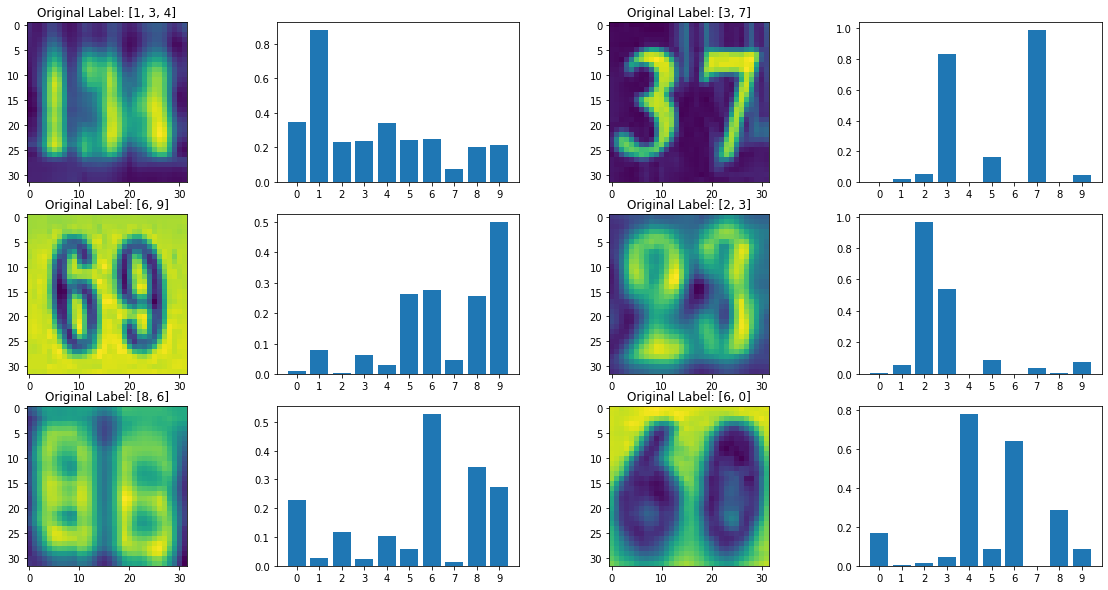

In [ ]:
# Predictions for best CNN Model

plt.rcParams["figure.figsize"] = 20, 10

idx = np.random.randint(0, SIZE["train"], 6)

for i in range(6):
  plt.subplot(3, 4, 2*i+1)
  plt.imshow(train_images[idx[i]])
  plt.title("Original Label: {}".format(train_labels[idx[i]]))

  plt.subplot(3, 4, 2*i + 2)
  plt.bar(x = np.arange(10), height=best_seq.predict(train_images[idx[i]][np.newaxis, ..., np.newaxis])[0])
  plt.xticks(np.arange(10))

plt.show()